In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score



In [2]:
df = pd.read_csv(r"C:\Users\thoma\AppData\Local\Programs\Python\Python310\Scripts\PDS\CASE1201.ASC.txt", sep=' ', skipinitialspace=True)


df.head()

,state,sat,takers,income,years,public,expend,rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5


In [3]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
sat,50.0,947.9400,70.856397,790.00,889.2500,966.00,998.5000,1088.00
takers,50.0,26.2200,22.022521,2.00,6.2500,16.00,47.7500,69.00
income,50.0,293.9800,43.693034,208.00,261.5000,295.00,325.0000,401.00
years,50.0,16.2092,0.699982,14.39,15.9100,16.36,16.7575,17.41
public,50.0,81.2040,9.830917,44.80,76.9250,80.80,88.2500,97.00
expend,50.0,22.9656,6.144932,13.84,19.5925,21.61,26.3875,50.10
rank,50.0,79.9880,6.523072,69.80,74.0250,80.85,85.8250,90.60


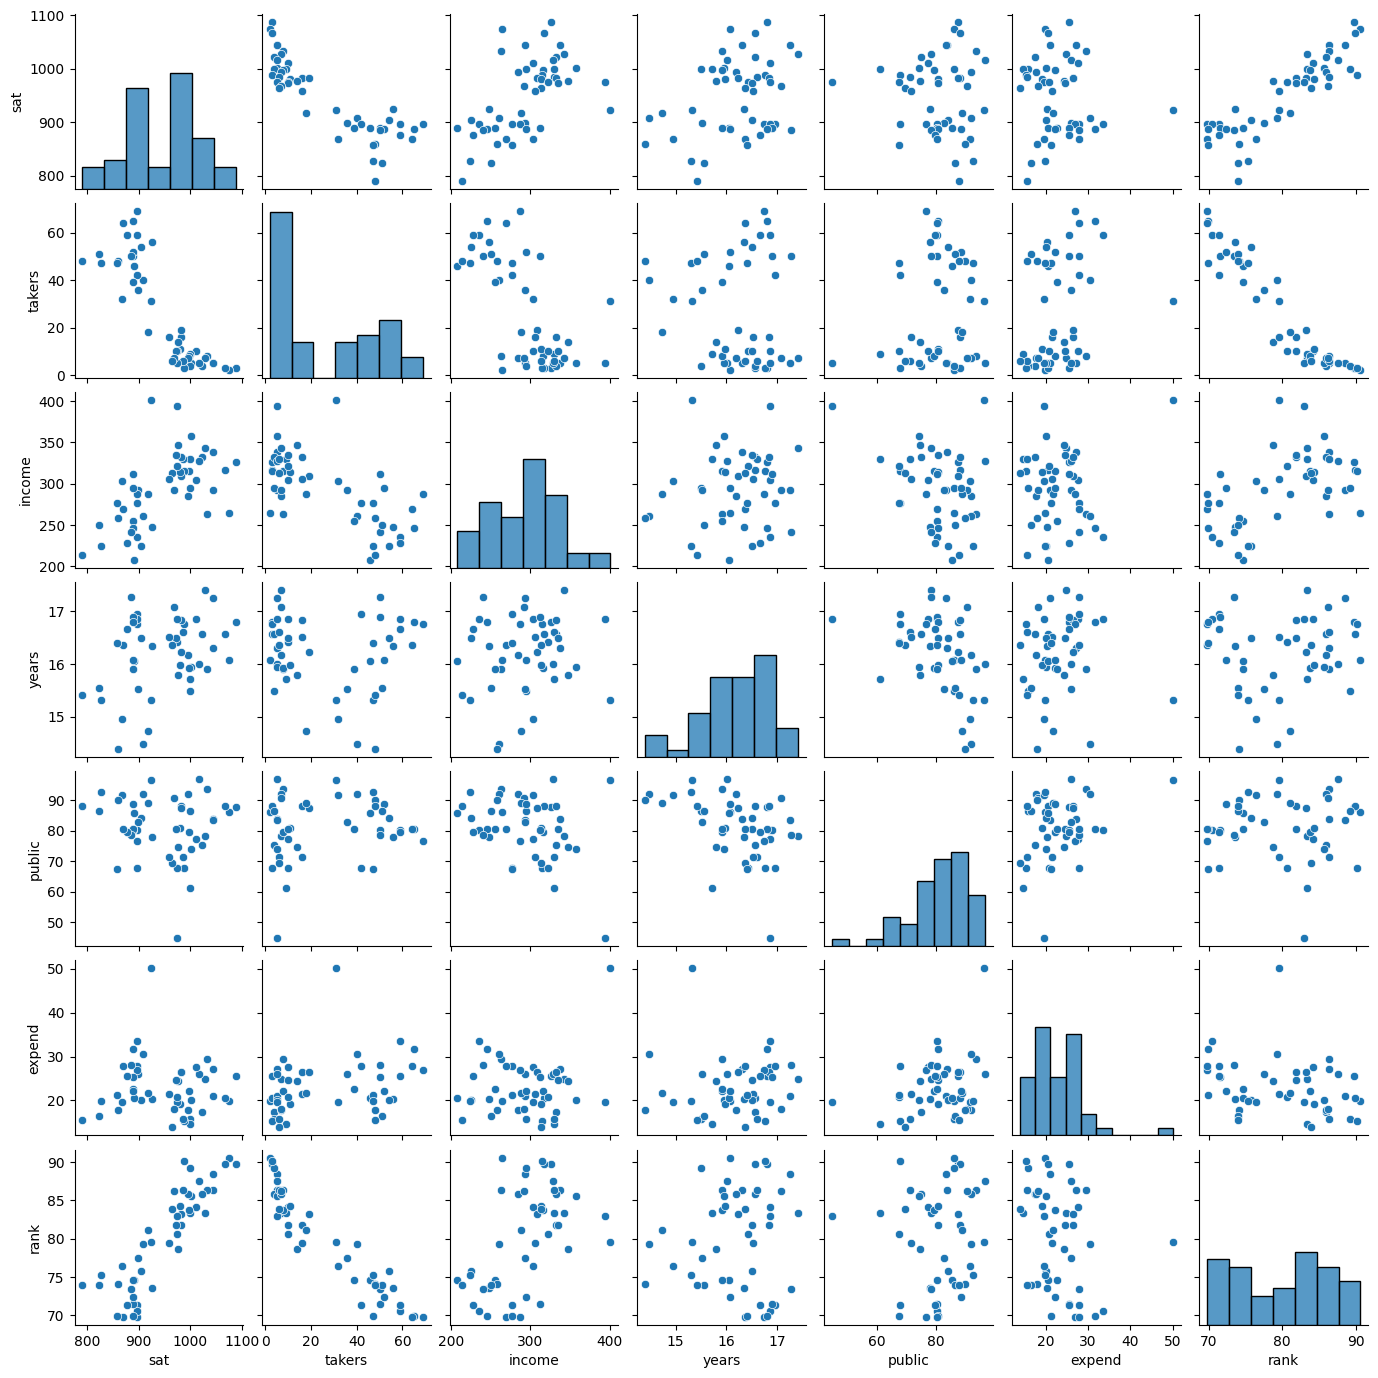

In [4]:
sns.pairplot(data=df, height=2)

In [5]:
U= df.iloc[:, 1].values.reshape(-1,1)

In [6]:
W=sm.add_constant(df.iloc[:,2].values)
out=pd.DataFrame(W)

In [7]:
out.head()

,0,1
0,1.0,3.0
1,1.0,2.0
2,1.0,3.0
3,1.0,5.0
4,1.0,5.0


In [8]:
X2=sm.add_constant(df.iloc[:, 2:].values)
out1=pd.DataFrame(X2)


In [9]:
out1.head()

,0,1,2,3,4,5,6
0,1.0,3.0,326.0,16.79,87.8,25.60,89.7
1,1.0,2.0,264.0,16.07,86.2,19.95,90.6
2,1.0,3.0,317.0,16.57,88.3,20.62,89.8
3,1.0,5.0,338.0,16.30,83.9,27.14,86.3
4,1.0,5.0,293.0,17.25,83.6,21.05,88.5


In [10]:
j = sm.OLS(U,W).fit()
j.summary(xname=['intercept','takers'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.7
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.77e-15
Time:                        20:01:26   Log-Likelihood:                -250.19
No. Observations:                  50   AIC:                             504.4
Df Residuals:                      48   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1020.3062      8.139    125.359      0.000    1003.941    1036.671
takers        -2.7600      0.239    -11.563      0.000      -3.240      -2.280
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.144
Skew:                          -0.131   Prob(JB):                        0.931
Kurtosis:                       3.011   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#variance of the model
j.mse_resid

1353.8901619553142

In [12]:
#Full Regression Model

s = sm.OLS(U,X2).fit()
s.summary(xname=['intercept','takers', 'income', 'years', 'public','expend','rank'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           4.16e-18
Time:                        20:01:26   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -94.6591    211.510     -0.448      0.657    -521.209     331.891
takers        -0.4801      0.694     -0.692      0.493      -1.879       0.919
income        -0.0082      0.152     -0.054      0.957      -0.315       0.299
years         22.6101      6.315      3.581      0.001       9.876      35.345
public        -0.4642      0.579     -0.802      0.427      -1.632       0.704
expend         2.2120      0.846      2.615      0.012       0.506       3.918
rank           8.4762      2.108      4.021      0.000       4.225      12.727
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.957
Skew:                          -0.591   Prob(JB):                        0.228
Kurtosis:                       3.152   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#variance of the model
s.mse_resid

<h2> METHOD FOR FILTER </h2>

In [13]:
X = df.drop({'state','sat'}, axis=1)

In [14]:
U = df['sat']

In [15]:
def filter_chi_squared(data, target, k=3):
    chi2_selector = SelectKBest(chi2, k=k)
    X_chi2 = chi2_selector.fit_transform(data, target)
    selected_features = data.columns[chi2_selector.get_support()]

    lr = LinearRegression().fit(X_chi2, target)
    y_pred_chi2 = lr.predict(X_chi2)
    r2_chi2 = r2_score(target, y_pred_chi2)

    return selected_features, r2_chi2

In [16]:
filter_chi_squared(X, U)

(Index(['takers', 'income', 'expend'], dtype='object'), 0.7759281497317616)

The Filter method, specifically the Chi-squared Test, identified 'takers', 'income', and 'expend' as the most significant features for the prediction. The resulting model obtained an R^2 score of 0.776, indicating that these features can account for 77.6% of the variability in the outcome variable.

<h2> Warppper Methods </h2>

In [17]:
def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [18]:
def wrapper_backward_elimination(data, target, significance_level=0.05):
    selected_features = backward_elimination(data, target, significance_level)
    X_backward = data[selected_features]

    lr = LinearRegression().fit(X_backward, target)
    y_pred_backward = lr.predict(X_backward)
    r2_backward = r2_score(target, y_pred_backward)

    return selected_features, r2_backward

In [19]:
import warnings
from warnings import simplefilter

# Ignore FutureWarning
simplefilter(action='ignore', category=FutureWarning)

In [20]:
wrapper_backward_elimination(X,U)

(['years', 'expend', 'rank'], 0.8711105337881823)


By using the Wrapper method, specifically the Backward Elimination approach, the analysis determined that 'years', 'expend', and 'rank' are the most relevant features for the prediction. The resulting model obtained an R^2 score of 0.871, indicating that these features can account for 87.1% of the variability in the target variable.

<h2> Embedded Method </h2>

In [21]:
def embedded_lasso(data, target, alpha=1.0):
    lasso = Lasso(alpha=alpha)
    lasso.fit(data, target)
    selected_features = data.columns[lasso.coef_ != 0]

    y_pred_lasso = lasso.predict(data[selected_features])
    r2_lasso = r2_score(target, y_pred_lasso)

    return selected_features, r2_lasso

In [22]:
embedded_lasso(X,U)

(Index(['takers', 'income', 'years', 'public', 'expend', 'rank'], dtype='object'),
 0.8781987462097269)

The Lasso Regression method, which is an Embedded method, chose to include all the available features ('takers', 'income', 'years', 'public', 'expend', and 'rank') in the model and achieved an R^2 score of 0.878, indicating that the model, with all the features, can account for 87.8% of the variation in the outcome variable.

# Conclusion


When we prioritize simplicity and interpretability of the model, it is advisable to use the Filter method since it selects a subset of features that are most relevant for the prediction. However, if the main objective is to attain the highest possible accuracy in predictions, it may be better to consider an Embedded method such as Lasso Regression. While the Embedded method has a higher R^2 score, it may not always lead to the best performance due to its assumptions and biases towards certain types of models. Therefore, the choice of feature selection method should depend on several factors, including the complexity of the data, the model being used, interpretability requirements, and the overall objective of the analysis.

<h2> Bonus Question (PCA) </h2>

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

pca_lr = LinearRegression().fit(X_pca, U)
y_pca_pred = pca_lr.predict(X_pca)

r2_pca = r2_score(U, y_pca_pred)

In [25]:
r2_pca

0.7364738543295739